In [ ]:
!pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-1c2higqh
  Running command git clone -q https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-1c2higqh
  Created wheel for XBNet: filename=XBNet-1.3.1-py3-none-any.whl size=8102 sha256=548bc910aab10e0f7a64de16a16b8ebbdac4f4c50a2a1a90a9b3ec52ab859263
  Stored in directory: /tmp/pip-ephem-wheel-cache-l26g2_50/wheels/23/c6/c1/0ee5a35c7a28c4dd8db05ce1407d1ccb0cfb036216e0c2ff92
Successfully built XBNet


This is based on paper named "**XBNet : An Extremely Boosted Neural Network**"

Link : https://arxiv.org/abs/2106.05239

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET

In [ ]:
import pandas as pd
file_path = r'C:\Users\coolb\Desktop\MLP\Phishing_Legitimate_full.csv'
data = pd.read_csv(file_path)
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
data=data.drop(['id'],axis=1)
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
y=data[['CLASS_LABEL']].to_numpy()
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
x=data.loc[:,:'PctExtNullSelfRedirectHyperlinksRT'].to_numpy()
x

array([[ 3.,  1.,  5., ...,  1., -1.,  1.],
       [ 3.,  1.,  3., ...,  1.,  1.,  1.],
       [ 3.,  1.,  2., ...,  1., -1.,  0.],
       ...,
       [ 2.,  1.,  4., ...,  1.,  0.,  1.],
       [ 3.,  1.,  1., ...,  1.,  0.,  1.],
       [ 3.,  1.,  2., ...,  1.,  1.,  1.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20, random_state= True,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 48), (2000, 48), (8000, 1), (2000, 1))

In [ ]:
y_train=y_train.reshape((-1))
y_train.shape

(8000,)

In [ ]:
y_test=y_test.reshape((-1))
y_test.shape

(2000,)

In [ ]:
model = XBNETClassifier(x_train,y_train,num_layers=2)

Enter dimensions of linear layers: 


Enter input dimensions of layer 1:  100
Enter output dimensions of layer 1:  100
Set bias as True or False:  false
Enter input dimensions of layer 2:  100
Enter output dimensions of layer 2:  100
Set bias as True or False:  false


Enter your last layer 


1. Sigmoid 
2. Softmax 
3. None 
 3


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

[15:25:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

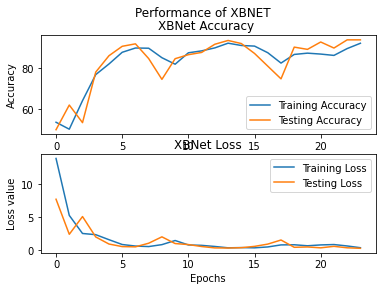

In [ ]:
m,acc, lo, val_ac, val_lo = run_XBNET(x_train,x_test,y_train,y_test,model,criterion,optimizer,epochs=24,batch_size=1024)

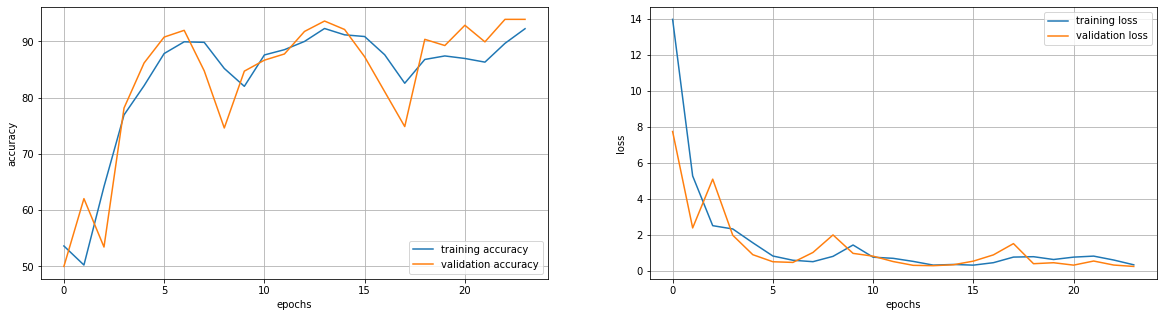

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(acc,label='training accuracy')
plt.plot(val_ac,label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(lo,label='training loss')
plt.plot(val_lo,label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()